IMPORTS

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [5]:
ep=pd.read_csv("expenses.csv")
print(ep.head())

         Date   Category  Amount              Description
0  2024-10-01    Grocery      60  Weekly grocery shopping
1  2024-10-01     Snacks      15                    Chips
2  2024-10-01      Lunch      30             Office lunch
3  2024-10-02  Transport      20         Bus fare to work
4  2024-10-02     Snacks      10                Chocolate


EXPLORATORY DATA ANALYSIS(EDA)

In [6]:
ep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         137 non-null    object
 1   Category     137 non-null    object
 2   Amount       137 non-null    int64 
 3   Description  137 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.4+ KB


In [7]:
ep.describe()

,Amount
count,137.000000
mean,30.109489
std,29.499671
min,5.000000
25%,12.000000
50%,25.000000
75%,35.000000
max,150.000000


CHECKING MISSING VALUES

In [8]:
ep.isnull().sum()

Date           0
Category       0
Amount         0
Description    0
dtype: int64

CALCULATE OVERALL EXPENSES

In [9]:
#total_expenses = df['Amount'].sum()
total_expenses=ep.Amount.sum()
print(total_expenses)

4125


EXPENSES BASED ON CATEGORIES

In [10]:
#expense_by_category = df.groupby('Category')['Amount'].sum()
expenses_by_category=ep.groupby('Category').Amount.sum()
expenses_by_category

Category
Fees           900
Grocery        770
Lunch         1457
Snacks         478
Stationary     155
Transport      365
Name: Amount, dtype: int64

VISUALISATION OF expenses_by_category USING BAR CHART

Text(0, 0.5, 'Amount Spent')

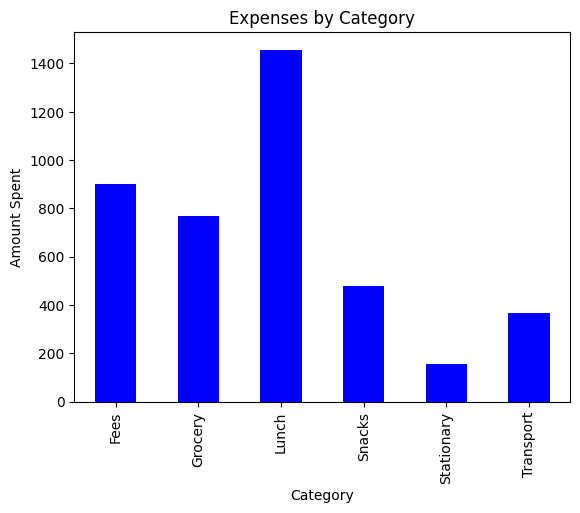

In [11]:
expenses_by_category.plot(kind='bar', color='b')
plt.title('Expenses by Category')
plt.xlabel('Category')
plt.ylabel('Amount Spent')

TIME BASED ANALYSIS

In [12]:
ep['Date']=pd.to_datetime(ep['Date'])

DAILY SPENDING TREND

Date
2024-10-01    105
2024-10-02     65
2024-10-03     50
2024-10-04     65
2024-10-05    100
2024-10-06     65
2024-10-07     50
2024-10-08    215
2024-10-09     90
2024-10-10     75
2024-10-11     55
2024-10-12    135
2024-10-13     50
2024-10-14     90
2024-10-15    195
2024-10-16     65
2024-10-17     60
2024-10-18    100
2024-10-19     70
2024-10-20    200
2024-10-21    105
2024-10-22     60
2024-10-23     65
2024-10-24    100
2024-10-25    200
2024-10-26     50
2024-10-27     85
2024-10-28     55
2024-10-29     60
2024-10-30    105
2024-10-31    200
2024-11-01     85
2024-11-02     58
2024-11-03     48
2024-11-04     65
2024-11-05    101
2024-11-06     60
2024-11-07     57
2024-11-08    220
2024-11-09    103
2024-11-10     65
2024-11-11     59
2024-11-12     60
2024-11-13     98
2024-11-14     61
Name: Amount, dtype: int64


[]

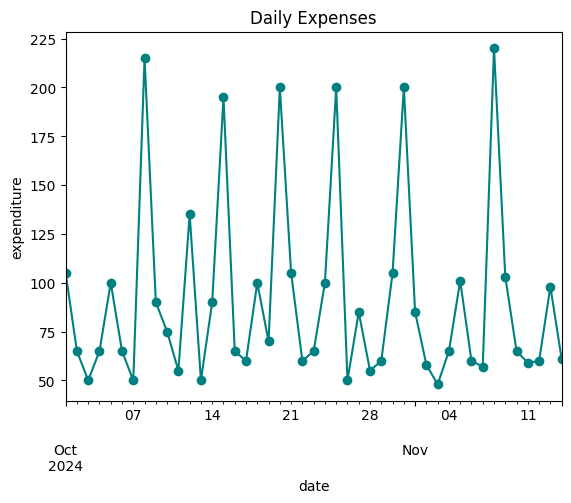

In [13]:
daily_expense=ep.groupby('Date')['Amount'].sum()
print(daily_expense)
daily_expense.plot(kind='line',marker='o',color='teal')
plt.title('Daily Expenses')
plt.xlabel('date')
plt.ylabel('expenditure')
plt.plot()


WEEKLY OR MONTHLY SPENDING TREND 

In [14]:
# ep['week']=ep['Date'].dt.isocalendar().week

# weekly_expenses=ep.groupby('week')['Amount'].sum()
# print(weekly_expenses)
# weekly_expenses.plot(kind='line', marker='o', color='purple')
# plt.title('weekly expenses')
# plt.xlabel('week')
# plt.ylabel('expenditure')
# plt.show()

Identify High-Spending Days

In [15]:
high_spending_days =daily_expense[daily_expense>100]
high_spending_days

Date
2024-10-01    105
2024-10-08    215
2024-10-12    135
2024-10-15    195
2024-10-20    200
2024-10-21    105
2024-10-25    200
2024-10-30    105
2024-10-31    200
2024-11-05    101
2024-11-08    220
2024-11-09    103
Name: Amount, dtype: int64

ANALYZING CATEGORIES WITH HIGHEST SPENDING IMPACT

Category
Lunch         1457
Fees           900
Grocery        770
Snacks         478
Transport      365
Stationary     155
Name: Amount, dtype: int64

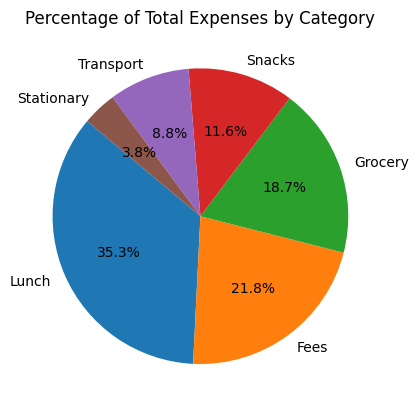

In [16]:
sorted_expenses_by_category=expenses_by_category.sort_values(ascending=False)
sorted_expenses_by_category.plot(kind='pie',autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total Expenses by Category')
plt.ylabel('')
sorted_expenses_by_category

AVERAGE DAILY SPENDING

In [17]:
mean_daily_expense=daily_expense.mean()
print(mean_daily_expense)

91.66666666666667


SEPERATE TARGET FROM PREDICTORS

In [18]:
ep_grouped = ep.groupby('Date').sum()
target = ep_grouped['Amount']
ep_grouped = ep_grouped.drop(['Amount'], axis=1)
ep_ = ep_grouped

SPLITTING THE DATA FOR TRAINING AND VALIDATION

In [19]:
# target = target.loc[ep_.index]
train_full_ep, valid_full_ep, train_target, valid_target = train_test_split(ep_, target, train_size=0.8, test_size=0.2, random_state=42, shuffle=False)
# print(train_target.head())
print(valid_target ) 
print(daily_expense)  


Date
2024-11-06     60
2024-11-07     57
2024-11-08    220
2024-11-09    103
2024-11-10     65
2024-11-11     59
2024-11-12     60
2024-11-13     98
2024-11-14     61
Name: Amount, dtype: int64
Date
2024-10-01    105
2024-10-02     65
2024-10-03     50
2024-10-04     65
2024-10-05    100
2024-10-06     65
2024-10-07     50
2024-10-08    215
2024-10-09     90
2024-10-10     75
2024-10-11     55
2024-10-12    135
2024-10-13     50
2024-10-14     90
2024-10-15    195
2024-10-16     65
2024-10-17     60
2024-10-18    100
2024-10-19     70
2024-10-20    200
2024-10-21    105
2024-10-22     60
2024-10-23     65
2024-10-24    100
2024-10-25    200
2024-10-26     50
2024-10-27     85
2024-10-28     55
2024-10-29     60
2024-10-30    105
2024-10-31    200
2024-11-01     85
2024-11-02     58
2024-11-03     48
2024-11-04     65
2024-11-05    101
2024-11-06     60
2024-11-07     57
2024-11-08    220
2024-11-09    103
2024-11-10     65
2024-11-11     59
2024-11-12     60
2024-11-13     98
2024-11-1

IDENTIFYING NUMERICAL AND CATEGORICAL COLUNMS

In [20]:
numerical_cols=[cname for cname in train_full_ep.columns if train_full_ep[cname].dtype in ['int64', 'float64']]
categorical_cols=[cname for cname in train_full_ep.columns if train_full_ep[cname].dtype =='object']

KEEP SELECTED COLUMNS ONLY

In [21]:
selected_cols=numerical_cols+categorical_cols
train_ep=train_full_ep[selected_cols].copy()
valid_ep=valid_full_ep[selected_cols].copy()

OneHotEncoding THE CATEGORICAL COLUMNS

In [22]:
numerical_transformer=SimpleImputer(strategy='median')

categorical_transformer=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

BUNDLING THE NUMERICAL AND CATEGORICAL COLUMNS

In [23]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

BUNDLING THE PREPROCESSOR AND MODEL INTO A PIPELINE 

In [24]:
ep_pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model', RandomForestRegressor(n_estimators=200, random_state=42, max_depth=5)),
])

FITTING THE MODEL AND GETTING PREDICTION ACCORING TO THE TOTAL DAILY EXPENDITURE

In [25]:
ep_pipeline.fit(train_ep, train_target)
preds=ep_pipeline.predict(valid_ep)

score=mean_absolute_error(valid_target,preds)
print("MAE=",score)

MAE= 13.631962278106586


COMPARISION OF ACTUAL AND PREDICTED VALUES

In [26]:
comparison_df = pd.DataFrame({
    'Actual': valid_target.values,
    'Predicted': preds
}, index=valid_target.index)

print(comparison_df)

            Actual   Predicted
Date                          
2024-11-06      60   60.962934
2024-11-07      57   53.548997
2024-11-08     220  120.272144
2024-11-09     103   96.460434
2024-11-10      65   60.962934
2024-11-11      59   53.570330
2024-11-12      60   60.962934
2024-11-13      98   96.460434
2024-11-14      61   60.962934


VISUALIZING THE PRDICTIONS TO THE ACTUAL VALUES

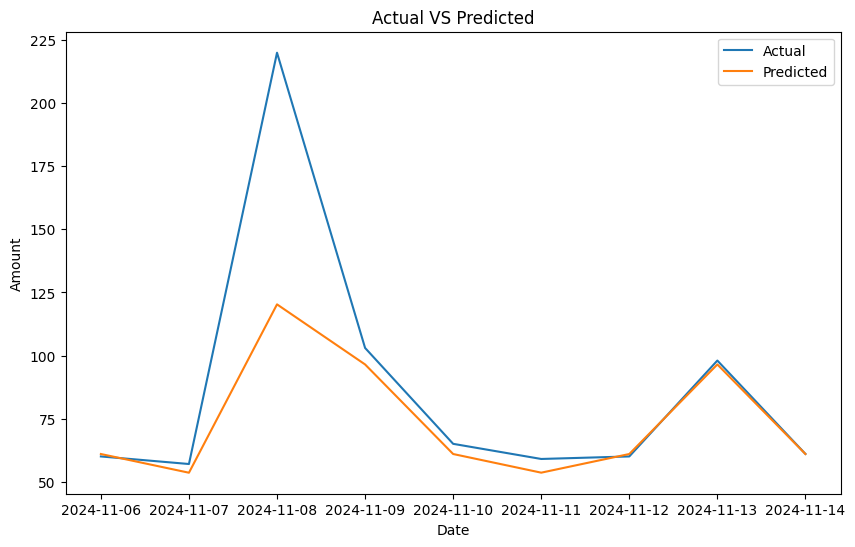

In [27]:
preds_series = pd.Series(preds, index=valid_target.index)
plt.figure(figsize=(10,6))
plt.plot(valid_target.index,valid_target,label='Actual')
plt.plot(valid_target.index, preds_series, label='Predicted')
plt.title('Actual VS Predicted')
plt.xlabel('Date')
plt.ylabel('Amount')

plt.legend()
plt.show()

CROSS VALIDATION

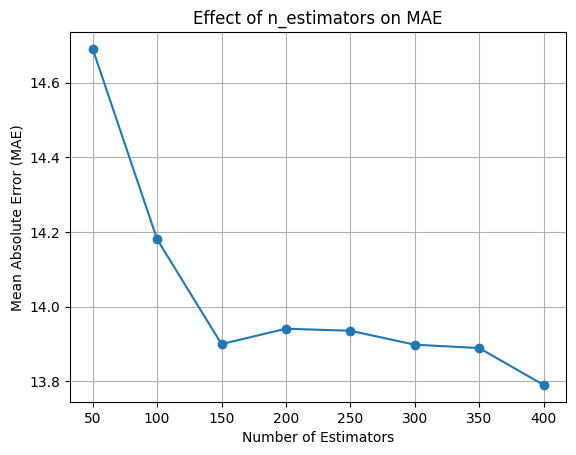

In [28]:
numerical_cols = [cname for cname in ep_.columns if ep_[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in ep_.columns if ep_[cname].dtype == 'object']

processor=ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])
def get_scores(n_estimators):
    cv_pipeline=Pipeline(steps=[
        ('preprocessor',processor ),
        ('model',RandomForestRegressor(n_estimators=n_estimators,random_state=0,max_depth=5))
    ])
    scores=-1 * cross_val_score(cv_pipeline,ep_,target, cv=5, scoring='neg_mean_absolute_error')
    return scores.mean()
mae_vals=[]
estimators = list(range(50, 401, 50))
for i in estimators:
    mae_vals.append(get_scores(i))
    # print(f'n_estimators={i}, MAE={mae_vals}')

plt.plot(estimators, mae_vals, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Effect of n_estimators on MAE')
plt.grid()
plt.show()

USING XGboost

In [ ]:

processor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)


processor.fit(train_ep)  
train_preprocessed = processor.transform(train_ep)  
valid_preprocessed = processor.transform(valid_ep)  


xg_model = XGBRegressor(
    random_state=45,
    n_estimators=1000,
    learning_rate=0.02,
    early_stopping_rounds=5,
    verbose=True
)


xg_model.fit(
    train_preprocessed, 
    train_target,
    eval_set=[(valid_preprocessed, valid_target)],
    verbose=0
)

preds = xg_model.predict(valid_preprocessed)
print(mean_absolute_error(valid_target,preds))

4.432596683502197


/home/suhaib/Documents/Expense-Tracker/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:42:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


USING GridSearchCv

In [30]:

param_grid={
    'n_estimators':[100,300,500],
    'learning_rate':[0.01, 0.05,0.5],
    'max_depth':[3,5,7],
    'subsample':[0.8, 1.0],
    'colsample_bytree':[0.8,1.0]
}
xg_model=XGBRegressor()
grid_search=GridSearchCV(
    estimator=xg_model,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(train_preprocessed,train_target)
best_params=grid_search.best_params_
print(best_params)
xg_model=XGBRegressor(
    random_state=45,
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree']
    )

xg_pipeline = Pipeline(
    steps=[
        ('preprocessor', processor),
        ('model', xg_model)
    ]
)
xg_pipeline.fit(train_ep,train_target)
preds=xg_pipeline.predict(valid_ep)
comparison_df = pd.DataFrame({
    'Actual': valid_target.values,
    'Predicted': preds
}, index=valid_target.index)

print(comparison_df)
print(mean_absolute_error(valid_target,preds))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500, 'subsample': 1.0}
            Actual   Predicted
Date                          
2024-11-06      60   64.916595
2024-11-07      57   50.018757
2024-11-08     220  214.837433
2024-11-09     103  100.808533
2024-11-10      65   64.916595
2024-11-11      59   50.018757
2024-11-12      60   64.916595
2024-11-13      98  100.808533
2024-11-14      61   64.916595
4.439805030822754


VISUALIZE THE PREDICTIONS

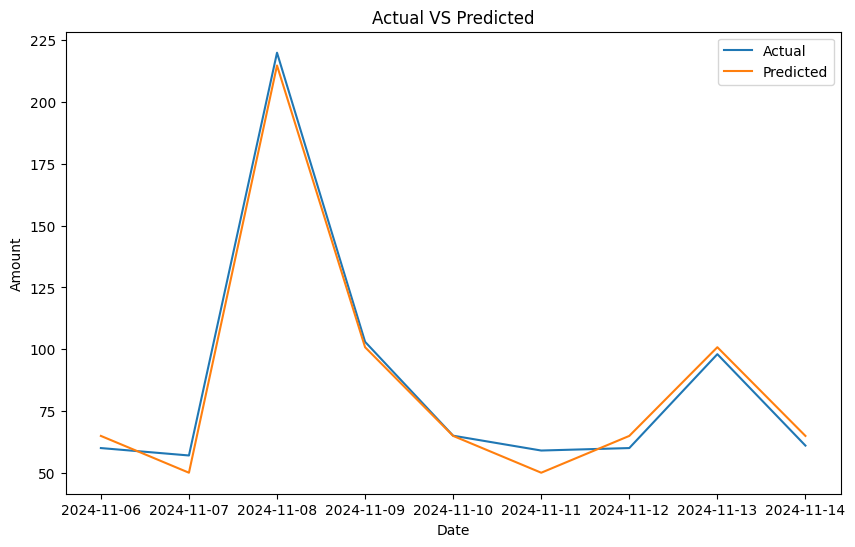

In [31]:
preds_series = pd.Series(preds, index=valid_target.index)
plt.figure(figsize=(10,6))
plt.plot(valid_target.index,valid_target,label='Actual')
plt.plot(valid_target.index, preds_series, label='Predicted')
plt.title('Actual VS Predicted')
plt.xlabel('Date')
plt.ylabel('Amount')

plt.legend()
plt.show()

FINALIZING THE PIPELIENE

In [32]:
processor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore',sparse_output=False), categorical_cols)
    ]
)

xg_model=XGBRegressor(
    random_state=45,
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=1.0,
    colsample_bytree=1.0,
    )

final_pipeline=Pipeline(
    steps=[
        ('preprocessor', processor),
        ('model', xg_model)
    ]
)
final_pipeline.fit(train_ep,train_target)
preds=final_pipeline.predict(valid_ep)
mae_pipeline = mean_absolute_error(valid_target, preds)
print(mae_pipeline)
comparison_df = pd.DataFrame({
    'Actual': valid_target.values,
    'Predicted': preds,
}, index=valid_target)
print(comparison_df)
print(daily_expense)

4.439805030822754
        Actual   Predicted
Amount                    
60          60   64.916595
57          57   50.018757
220        220  214.837433
103        103  100.808533
65          65   64.916595
59          59   50.018757
60          60   64.916595
98          98  100.808533
61          61   64.916595
Date
2024-10-01    105
2024-10-02     65
2024-10-03     50
2024-10-04     65
2024-10-05    100
2024-10-06     65
2024-10-07     50
2024-10-08    215
2024-10-09     90
2024-10-10     75
2024-10-11     55
2024-10-12    135
2024-10-13     50
2024-10-14     90
2024-10-15    195
2024-10-16     65
2024-10-17     60
2024-10-18    100
2024-10-19     70
2024-10-20    200
2024-10-21    105
2024-10-22     60
2024-10-23     65
2024-10-24    100
2024-10-25    200
2024-10-26     50
2024-10-27     85
2024-10-28     55
2024-10-29     60
2024-10-30    105
2024-10-31    200
2024-11-01     85
2024-11-02     58
2024-11-03     48
2024-11-04     65
2024-11-05    101
2024-11-06     60
2024-11-07    